In [24]:
!git clone https://github.com/jmsaavedrar/machine_learning
import sys
sys.path.append('/content/machine_learning/mnist')
import os 
import torch.utils.data as data
import dataloader
import torch 
import model


Cloning into 'machine_learning'...
remote: Enumerating objects: 478, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 478 (delta 81), reused 73 (delta 45), pack-reused 338 (from 1)
Receiving objects: 100% (478/478), 960.35 KiB | 3.49 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [25]:
!wget  "https://www.dropbox.com/scl/fi/tvrvsl2nd7e1upcmazgm1/MNIST-5000.zip?rlkey=j5a7rauyg83p0x6ybltev9pgj&st=1c4aqapo" -O  MNIST-5000.zip

--2025-05-22 17:57:02--  https://www.dropbox.com/scl/fi/tvrvsl2nd7e1upcmazgm1/MNIST-5000.zip?rlkey=j5a7rauyg83p0x6ybltev9pgj&st=1c4aqapo
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5d660e225ea7aa79c6780c96b7.dl.dropboxusercontent.com/cd/0/inline/CqMnlc8SCdRonUtIBB-Pqv5agbsjEBhd2LIGljHr5Sm_br6xnNM7n_fwUGYmJ8ei2xV30gdHFzsGe56t06V8WE7IWQS97jAQvDQ2PPip0JW2jhYP0nk8v7pcEsHGPydwVHeiZXm_VRhj-loPBopLZVlt/file# [following]
--2025-05-22 17:57:03--  https://uc5d660e225ea7aa79c6780c96b7.dl.dropboxusercontent.com/cd/0/inline/CqMnlc8SCdRonUtIBB-Pqv5agbsjEBhd2LIGljHr5Sm_br6xnNM7n_fwUGYmJ8ei2xV30gdHFzsGe56t06V8WE7IWQS97jAQvDQ2PPip0JW2jhYP0nk8v7pcEsHGPydwVHeiZXm_VRhj-loPBopLZVlt/file
Resolving uc5d660e225ea7aa79c6780c96b7.dl.dropboxusercontent.com (uc5d660e225ea7aa79c6780c96b7.dl.dropboxusercontent.com)... 162.12

In [26]:
!unzip MNIST-5000.zip

Archive:  MNIST-5000.zip
   creating: MNIST-5000/
  inflating: MNIST-5000/train.txt    
  inflating: MNIST-5000/valid.txt    
   creating: MNIST-5000/train_images/
  inflating: MNIST-5000/train_images/digit_mnist_14989_3.png  
  inflating: MNIST-5000/train_images/digit_mnist_10851_4.png  
  inflating: MNIST-5000/train_images/digit_mnist_11119_1.png  
  inflating: MNIST-5000/train_images/digit_mnist_10119_0.png  
  inflating: MNIST-5000/train_images/digit_mnist_10142_7.png  
  inflating: MNIST-5000/train_images/digit_mnist_14528_0.png  
  inflating: MNIST-5000/train_images/digit_mnist_13948_6.png  
  inflating: MNIST-5000/train_images/digit_mnist_10199_3.png  
  inflating: MNIST-5000/train_images/digit_mnist_13008_5.png  
  inflating: MNIST-5000/train_images/digit_mnist_12851_6.png  
  inflating: MNIST-5000/train_images/digit_mnist_10743_4.png  
  inflating: MNIST-5000/train_images/digit_mnist_13185_4.png  
  inflating: MNIST-5000/train_images/digit_mnist_13241_4.png  
  inflating: MNIS

In [ ]:
#download dataset
#clone machine learning repo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#1: dataset loader (defining dataset)
datapath = 'MNIST-5000'
#datapath = '/home/data/MNIST-5000'
tr_dataset = dataloader.MNIST_Dataloader(datapath, datatype = 'train')
tr_dataset = data.DataLoader(tr_dataset, batch_size = 64, shuffle = True)

val_dataset = dataloader.MNIST_Dataloader(datapath, datatype = 'valid')
val_dataset = data.DataLoader(val_dataset, batch_size = 64, shuffle = False)

cuda
dataset size: 5000
dataset size: 500


In [ ]:
#2: defining the model
mnist_model = model.mnist_conv()
if device == torch.device('cuda') :
    mnist_model.to(device)
    
# defining loss and optimize
loss_fn = torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(mnist_model.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.AdamW(mnist_model.parameters())


In [12]:

mnist_model.fit(tr_dataset, val_dataset, optimizer, loss_fn, 20)

EPOCH 1:
  batch 7 loss: 2.221536704472133 acc: 0.2388392984867096
  batch 14 loss: 2.1224162578582764 acc: 0.3325892984867096
  batch 21 loss: 2.042554259300232 acc: 0.3415178656578064
  batch 28 loss: 1.99947156224932 acc: 0.3571428656578064
  batch 35 loss: 1.9447166579110282 acc: 0.3638392984867096
  batch 42 loss: 1.8629402773720878 acc: 0.4776785969734192
  batch 49 loss: 1.8573260818208968 acc: 0.424107164144516
  batch 56 loss: 1.7564775603158134 acc: 0.5066964626312256
  batch 63 loss: 1.7184261594499861 acc: 0.4486607313156128
  batch 70 loss: 1.6836128064564295 acc: 0.546875
  batch 77 loss: 1.6306312424795968 acc: 0.5267857313156128
 TRAIN: [loss 1.6306312424795968 acc 0.5267857313156128] VAL : [loss 1.6016042232513428 acc 0.48993390798568726]
EPOCH 2:
  batch 7 loss: 1.6079676832471574 acc: 0.566964328289032
  batch 14 loss: 1.5302366358893258 acc: 0.625
  batch 21 loss: 1.5132132428033012 acc: 0.6160714626312256
  batch 28 loss: 1.4723164524350847 acc: 0.6517857313156128


#Prediction

torch.Size([1, 1, 28, 28])
tensor([[ 6.4611, -5.6428, -1.8082, -7.7208, -5.9456, -3.0032,  0.0601, -3.5230,
         -3.7420, -3.9372]])
tensor([9.9789e-01, 5.5261e-06, 2.5574e-04, 6.9175e-07, 4.0825e-06, 7.7409e-05,
        1.6564e-03, 4.6030e-05, 3.6977e-05, 3.0422e-05])
0 0.9978867173194885


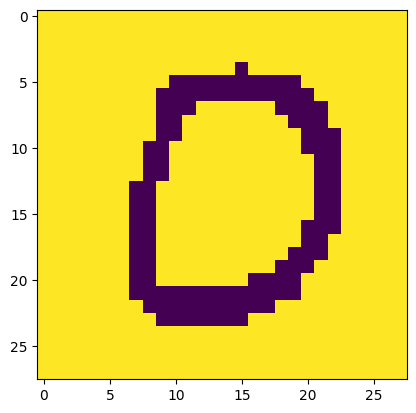

In [23]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
mnist_model = model.mnist_conv()
mnist_model.load_state_dict(torch.load('model_mnist', weights_only=True))
mnist_model.eval()
fimage = os.path.join(datapath, 'valid_images/digit_mnist_00001_7.png')
fimage = os.path.join(datapath, 'valid_images/digit_mnist_00002_2.png')
fimage = os.path.join(datapath, 'valid_images/digit_mnist_00011_0.png')
#fimage = '/home/data/MNIST-5000/valid_images/digit_mnist_00012_6.png'
image_array = np.array(PIL.Image.open(fimage), dtype = np.float32) / 255.0
image = torch.Tensor(image_array)
plt.imshow(image_array)
image = image.view([1,1,image.size()[0], image.size()[1]])
print(image.shape)

with torch.no_grad() :
    logits = mnist_model(image)
    probs = torch.nn.Softmax(dim = 0)(logits[0])
    print(logits)
    
    cls = torch.Tensor.argmax(probs)
    print(probs)
    print('{} {}'.format(cls, probs[cls]))
plt.show()